
# CASE STUDY - AMAZON reviews sentimental analysis
- Extract reviews of any product from ecommerce website like amazon
-  Perform emotion mining

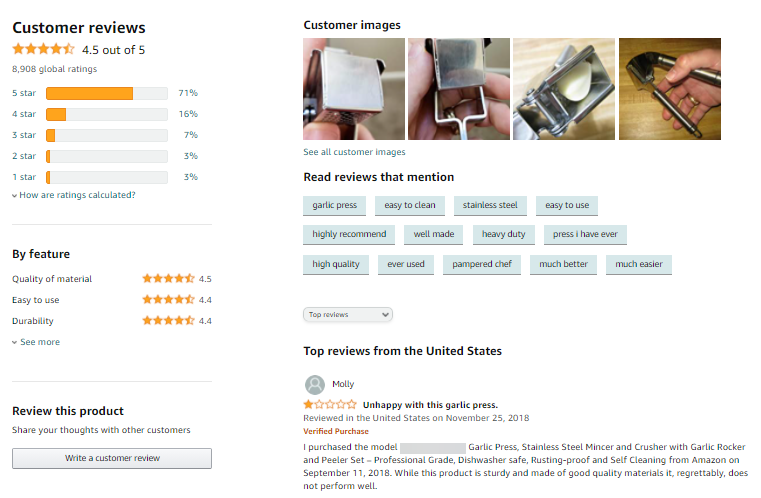

# PART 1

--------------------------------------------------------------------------------------------------------

# web scrapping using beautiful soup

In [55]:
#loading libraries

import pandas as pd
import requests
from bs4 import BeautifulSoup

In [56]:
#defining header

headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/iQOO-Storage-Dimensity-Processor-Segment/product-reviews/B07WGPKNGT/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [57]:
#defining soup

def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [58]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [59]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [60]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in range(1,1000):
    soup = get_soup(f'https://www.amazon.in/iQOO-Storage-Dimensity-Processor-Segment/product-reviews/B07WGPKNGT/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

In [61]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nAwesome phone that comes w...,"After using this phone for a month, here's wha...",Reviewed in India 🇮🇳 on 12 June 2023
1,4.0,4.0 out of 5 stars\nWell this is my honest review,This is my first time using a vivo/iqoo phone....,Reviewed in India 🇮🇳 on 26 April 2023
2,4.0,4.0 out of 5 stars\nOne of the best device und...,"The look and feel of the device is good, plus ...",Reviewed in India 🇮🇳 on 22 July 2023
3,4.0,4.0 out of 5 stars\nExperience peak performanc...,"After a week of use, I have discovered that th...",Reviewed in India 🇮🇳 on 22 June 2023
4,4.0,4.0 out of 5 stars\nWorst camera - best perfor...,If you want a mobile for performance and multi...,Reviewed in India 🇮🇳 on 13 July 2023
...,...,...,...,...
95,5.0,5.0 out of 5 stars\nPubg 90 fps,Best in segment of gaming,Reviewed in India 🇮🇳 on 21 July 2023
96,4.0,4.0 out of 5 stars\nThik thak hai jyada Expect...,Gaming ke liye thik hai,Reviewed in India 🇮🇳 on 30 May 2023
97,3.0,3.0 out of 5 stars\nHeating problems 😞,Media tech not for gaming,Reviewed in India 🇮🇳 on 20 July 2023
98,3.0,3.0 out of 5 stars\nDisappointed in Apps clone,Only supporting 10% of apps while clone,Reviewed in India 🇮🇳 on 23 July 2023


In [62]:
df.to_csv("Amazon_Reviews.csv")

--------------------------------------------------------------------------------------------------------------------------------------------------------------

PART 2

# SENTIMENTAL ANALYSIS

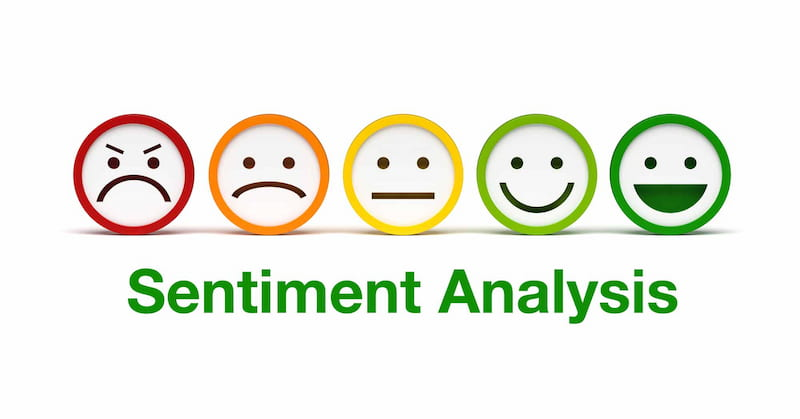

**NLP**
-----

- Natural language processing (NLP) is a branch of artificial intelligence (AI) that enables computers to comprehend, generate, and manipulate human language.
- Natural language processing has the ability to interrogate the data with natural language text or voice.

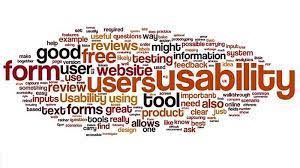

In [352]:
#Import Libraries

#SET 1 : DATA MANIPULATION AND ANALYSIS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook


#SET 2 : TEXT MINING SPECIFIC
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#SET 3 : TEXT SENTIMENT SPECIFIC
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer


# downloading stopwords corpus/collection
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [354]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews.csv')
reviews.head()

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,4.0,4.0 out of 5 stars\nAwesome phone that comes w...,"After using this phone for a month, here's wha...",Reviewed in India 🇮🇳 on 12 June 2023
1,1,4.0,4.0 out of 5 stars\nWell this is my honest review,This is my first time using a vivo/iqoo phone....,Reviewed in India 🇮🇳 on 26 April 2023
2,2,4.0,4.0 out of 5 stars\nOne of the best device und...,"The look and feel of the device is good, plus ...",Reviewed in India 🇮🇳 on 22 July 2023
3,3,4.0,4.0 out of 5 stars\nExperience peak performanc...,"After a week of use, I have discovered that th...",Reviewed in India 🇮🇳 on 22 June 2023
4,4,4.0,4.0 out of 5 stars\nWorst camera - best perfor...,If you want a mobile for performance and multi...,Reviewed in India 🇮🇳 on 13 July 2023


In [355]:
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)

In [356]:
reviews.head()

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nAwesome phone that comes w...,"After using this phone for a month, here's wha...",Reviewed in India 🇮🇳 on 12 June 2023
1,4.0,4.0 out of 5 stars\nWell this is my honest review,This is my first time using a vivo/iqoo phone....,Reviewed in India 🇮🇳 on 26 April 2023
2,4.0,4.0 out of 5 stars\nOne of the best device und...,"The look and feel of the device is good, plus ...",Reviewed in India 🇮🇳 on 22 July 2023
3,4.0,4.0 out of 5 stars\nExperience peak performanc...,"After a week of use, I have discovered that th...",Reviewed in India 🇮🇳 on 22 June 2023
4,4.0,4.0 out of 5 stars\nWorst camera - best perfor...,If you want a mobile for performance and multi...,Reviewed in India 🇮🇳 on 13 July 2023


In [357]:
r1=reviews.copy()

TEXT MINING
---
- no of words
- average lenght
- special characters
- unique words

In [358]:
reviews.Rating.describe()

count    100.000000
mean       4.190000
std        0.580752
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

Number of Words

In [359]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,"After using this phone for a month, here's wha...",475
1,This is my first time using a vivo/iqoo phone....,232
2,"The look and feel of the device is good, plus ...",47
3,"After a week of use, I have discovered that th...",151
4,If you want a mobile for performance and multi...,53


Number of characters

In [360]:
reviews['char_count'] = reviews['Review'].str.len()
reviews[['Review','char_count']].head()

,Review,char_count
0,"After using this phone for a month, here's wha...",2648
1,This is my first time using a vivo/iqoo phone....,1308
2,"The look and feel of the device is good, plus ...",245
3,"After a week of use, I have discovered that th...",895
4,If you want a mobile for performance and multi...,269


Average Word Length

In [361]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,"After using this phone for a month, here's wha...",4.586498
1,This is my first time using a vivo/iqoo phone....,4.642241
2,"The look and feel of the device is good, plus ...",4.234043
3,"After a week of use, I have discovered that th...",4.933775
4,If you want a mobile for performance and multi...,4.094340


Number of stopwords

In [362]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,"After using this phone for a month, here's wha...",183
1,This is my first time using a vivo/iqoo phone....,90
2,"The look and feel of the device is good, plus ...",24
3,"After a week of use, I have discovered that th...",62
4,If you want a mobile for performance and multi...,18


Number of special characters

In [363]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,"After using this phone for a month, here's wha...",0
1,This is my first time using a vivo/iqoo phone....,0
2,"The look and feel of the device is good, plus ...",0
3,"After a week of use, I have discovered that th...",0
4,If you want a mobile for performance and multi...,0


Number of numerics

In [364]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,"After using this phone for a month, here's wha...",8
1,This is my first time using a vivo/iqoo phone....,1
2,"The look and feel of the device is good, plus ...",0
3,"After a week of use, I have discovered that th...",0
4,If you want a mobile for performance and multi...,0


 Number of Uppercase words

In [365]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,"After using this phone for a month, here's wha...",10
1,This is my first time using a vivo/iqoo phone....,1
2,"The look and feel of the device is good, plus ...",0
3,"After a week of use, I have discovered that th...",6
4,If you want a mobile for performance and multi...,0


In [366]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

Spelling correction


In [367]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    After using this phone for a month, here's wha...
1    His is my first time using a vive/into phone.....
2    The look and feel of the device is good, plus ...
3    After a week of use, I have discovered that th...
4    Of you want a mobile for performance and multi...
Name: Review, dtype: object

Visualizing

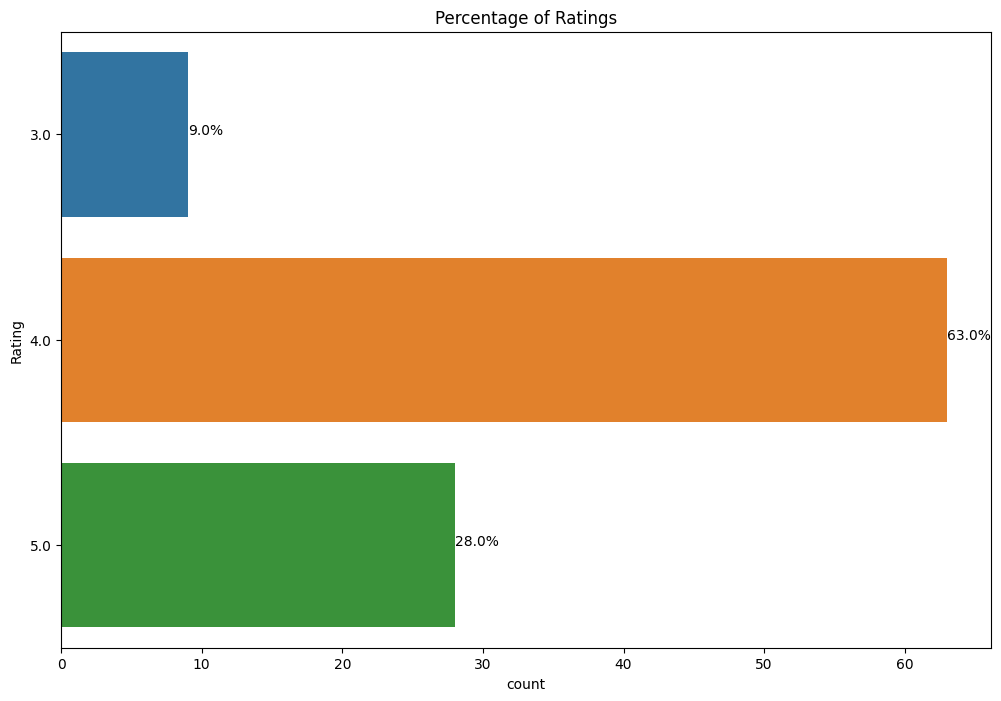

In [368]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [369]:
reviews.head()

,Rating,Title,Review,Review_Date,hashtags
0,4.0,4.0 out of 5 stars\nAwesome phone that comes w...,"After using this phone for a month, here's wha...",Reviewed in India 🇮🇳 on 12 June 2023,0
1,4.0,4.0 out of 5 stars\nWell this is my honest review,This is my first time using a vivo/iqoo phone....,Reviewed in India 🇮🇳 on 26 April 2023,0
2,4.0,4.0 out of 5 stars\nOne of the best device und...,"The look and feel of the device is good, plus ...",Reviewed in India 🇮🇳 on 22 July 2023,0
3,4.0,4.0 out of 5 stars\nExperience peak performanc...,"After a week of use, I have discovered that th...",Reviewed in India 🇮🇳 on 22 June 2023,0
4,4.0,4.0 out of 5 stars\nWorst camera - best perfor...,If you want a mobile for performance and multi...,Reviewed in India 🇮🇳 on 13 July 2023,0


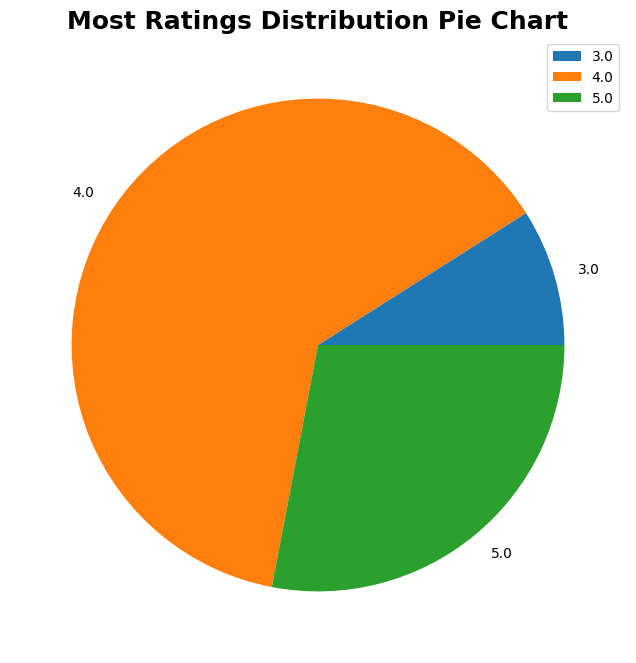

In [370]:
plt.figure(figsize = (12,8))
plt.pie(reviews['Rating'].value_counts().sort_index(),labels=reviews['Rating'].value_counts().sort_index().index,)
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

Text Preprocessing For Classification
----

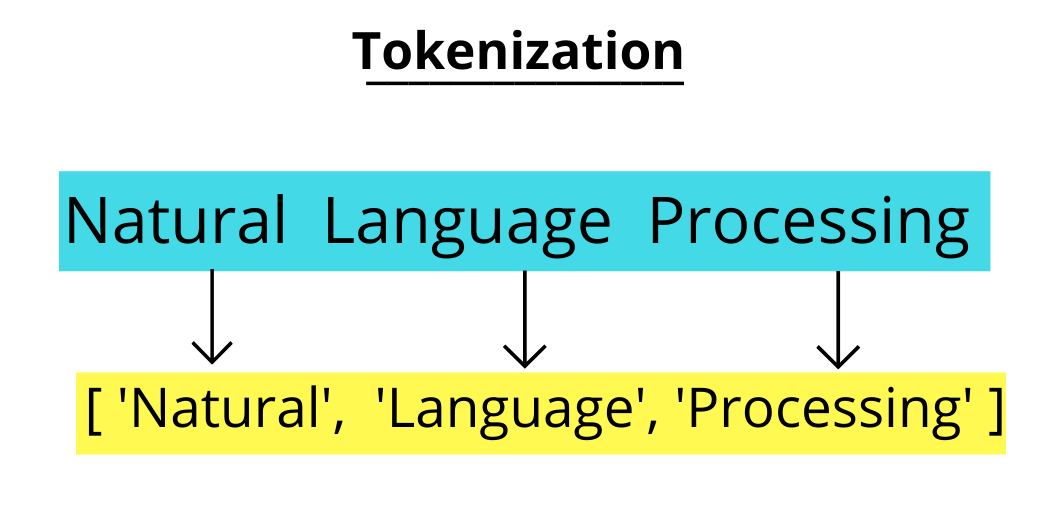

In [371]:
data = reviews[['Review']]
data

,Review
0,"After using this phone for a month, here's wha..."
1,This is my first time using a vivo/iqoo phone....
2,"The look and feel of the device is good, plus ..."
3,"After a week of use, I have discovered that th..."
4,If you want a mobile for performance and multi...
...,...
95,Best in segment of gaming
96,Gaming ke liye thik hai
97,Media tech not for gaming
98,Only supporting 10% of apps while clone


In [372]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [373]:
data.head()

,Review
0,"after using phone month, here's i found out.pr..."
1,this first time using vivo/iqoo phone.. using ...
2,"the look feel device good, plus performance ph..."
3,"after week use, i discovered smartphone functi..."
4,if want mobile performance multimedia purpose ...


In [374]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in range(0, len(data)):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

In [375]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,using phone month found pro let talk screen sc...,using phone month found pro let talk screen sc...
1,first time using vivo iqoo phone using asus mo...,first time using vivo iqoo phone using asus mo...
2,look feel device good plus performance phone a...,look feel device good plus performance phone a...
3,week use discovered smartphone function intend...,week use discovered smartphone function intend...
4,want mobile performance multimedia purpose k u...,want mobile performance multimedia purpose k u...


Text Pre-processing 2
----

In [376]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [377]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using phone month found pro let talk screen sc...,using phone month found pro let talk screen sc...
1,first time using vivo iqoo phone using asus mo...,first time using vivo iqoo phone using asus mo...
2,look feel device good plus performance phone a...,look feel device good plus performance phone a...
3,week use discovered smartphone function intend...,week use discovered smartphone function intend...
4,want mobile performance multimedia purpose k u...,want mobile performance multimedia purpose k u...
5,go gaming video editing heavy task issue camer...,go gaming video editing heavy task issue camer...
6,doubtly buy phone issue facing wide camera una...,doubtly buy phone issue facing wide camera una...
7,could better snapdragon gen gen gen overall ph...,could better snapdragon gen gen gen overall ph...
8,let give genuine original review uncommon matt...,let give genuine original review uncommon matt...
9,like performance phone lagging issue happened ...,like performance phone lagging issue happened ...


 Removing links (http | https)

In [378]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using phone month found pro let talk screen sc...,using phone month found pro let talk screen sc...
1,first time using vivo iqoo phone using asus mo...,first time using vivo iqoo phone using asus mo...
2,look feel device good plus performance phone a...,look feel device good plus performance phone a...
3,week use discovered smartphone function intend...,week use discovered smartphone function intend...
4,want mobile performance multimedia purpose k u...,want mobile performance multimedia purpose k u...
5,go gaming video editing heavy task issue camer...,go gaming video editing heavy task issue camer...
6,doubtly buy phone issue facing wide camera una...,doubtly buy phone issue facing wide camera una...
7,could better snapdragon gen gen gen overall ph...,could better snapdragon gen gen gen overall ph...
8,let give genuine original review uncommon matt...,let give genuine original review uncommon matt...
9,like performance phone lagging issue happened ...,like performance phone lagging issue happened ...


Removing Review with empty text

In [379]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,using phone month found pro let talk screen sc...,using phone month found pro let talk screen sc...
1,first time using vivo iqoo phone using asus mo...,first time using vivo iqoo phone using asus mo...
2,look feel device good plus performance phone a...,look feel device good plus performance phone a...
3,week use discovered smartphone function intend...,week use discovered smartphone function intend...
4,want mobile performance multimedia purpose k u...,want mobile performance multimedia purpose k u...


 Dropping duplicate rows

In [380]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using phone month found pro let talk screen sc...,using phone month found pro let talk screen sc...
1,first time using vivo iqoo phone using asus mo...,first time using vivo iqoo phone using asus mo...
2,look feel device good plus performance phone a...,look feel device good plus performance phone a...
3,week use discovered smartphone function intend...,week use discovered smartphone function intend...
4,want mobile performance multimedia purpose k u...,want mobile performance multimedia purpose k u...
5,go gaming video editing heavy task issue camer...,go gaming video editing heavy task issue camer...
6,doubtly buy phone issue facing wide camera una...,doubtly buy phone issue facing wide camera una...
7,could better snapdragon gen gen gen overall ph...,could better snapdragon gen gen gen overall ph...
8,let give genuine original review uncommon matt...,let give genuine original review uncommon matt...
9,like performance phone lagging issue happened ...,like performance phone lagging issue happened ...


Resetting index

In [381]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using phone month found pro let talk screen sc...,using phone month found pro let talk screen sc...
1,first time using vivo iqoo phone using asus mo...,first time using vivo iqoo phone using asus mo...
2,look feel device good plus performance phone a...,look feel device good plus performance phone a...
3,week use discovered smartphone function intend...,week use discovered smartphone function intend...
4,want mobile performance multimedia purpose k u...,want mobile performance multimedia purpose k u...
5,go gaming video editing heavy task issue camer...,go gaming video editing heavy task issue camer...
6,doubtly buy phone issue facing wide camera una...,doubtly buy phone issue facing wide camera una...
7,could better snapdragon gen gen gen overall ph...,could better snapdragon gen gen gen overall ph...
8,let give genuine original review uncommon matt...,let give genuine original review uncommon matt...
9,like performance phone lagging issue happened ...,like performance phone lagging issue happened ...


Removing Punctuations, Numbers and Special chars

In [382]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [383]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using phone month found pro let talk screen sc...,using phone month found pro let talk screen sc...
1,first time using vivo iqoo phone using asus mo...,first time using vivo iqoo phone using asus mo...
2,look feel device good plus performance phone a...,look feel device good plus performance phone a...
3,week use discovered smartphone function intend...,week use discovered smartphone function intend...
4,want mobile performance multimedia purpose k u...,want mobile performance multimedia purpose k u...
5,go gaming video editing heavy task issue camer...,go gaming video editing heavy task issue camer...
6,doubtly buy phone issue facing wide camera una...,doubtly buy phone issue facing wide camera una...
7,could better snapdragon gen gen gen overall ph...,could better snapdragon gen gen gen overall ph...
8,let give genuine original review uncommon matt...,let give genuine original review uncommon matt...
9,like performance phone lagging issue happened ...,like performance phone lagging issue happened ...


 Function to remove emoji

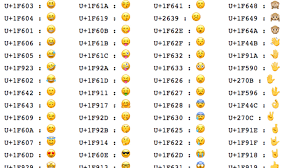

In [384]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [385]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using phone month found pro let talk screen sc...,using phone month found pro let talk screen sc...
1,first time using vivo iqoo phone using asus mo...,first time using vivo iqoo phone using asus mo...
2,look feel device good plus performance phone a...,look feel device good plus performance phone a...
3,week use discovered smartphone function intend...,week use discovered smartphone function intend...
4,want mobile performance multimedia purpose k u...,want mobile performance multimedia purpose k u...
5,go gaming video editing heavy task issue camer...,go gaming video editing heavy task issue camer...
6,doubtly buy phone issue facing wide camera una...,doubtly buy phone issue facing wide camera una...
7,could better snapdragon gen gen gen overall ph...,could better snapdragon gen gen gen overall ph...
8,let give genuine original review uncommon matt...,let give genuine original review uncommon matt...
9,like performance phone lagging issue happened ...,like performance phone lagging issue happened ...


In [386]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,using phone month found pro let talk screen sc...,using phone month found pro let talk screen sc...,"[using, phone, month, found, pro, let, talk, s..."
1,first time using vivo iqoo phone using asus mo...,first time using vivo iqoo phone using asus mo...,"[first, time, using, vivo, iqoo, phone, using,..."
2,look feel device good plus performance phone a...,look feel device good plus performance phone a...,"[look, feel, device, good, plus, performance, ..."
3,week use discovered smartphone function intend...,week use discovered smartphone function intend...,"[week, use, discovered, smartphone, function, ..."
4,want mobile performance multimedia purpose k u...,want mobile performance multimedia purpose k u...,"[want, mobile, performance, multimedia, purpos..."
5,go gaming video editing heavy task issue camer...,go gaming video editing heavy task issue camer...,"[go, gaming, video, editing, heavy, task, issu..."
6,doubtly buy phone issue facing wide camera una...,doubtly buy phone issue facing wide camera una...,"[doubtly, buy, phone, issue, facing, wide, cam..."
7,could better snapdragon gen gen gen overall ph...,could better snapdragon gen gen gen overall ph...,"[could, better, snapdragon, gen, gen, gen, ove..."
8,let give genuine original review uncommon matt...,let give genuine original review uncommon matt...,"[let, give, genuine, original, review, uncommo..."
9,like performance phone lagging issue happened ...,like performance phone lagging issue happened ...,"[like, performance, phone, lagging, issue, hap..."


In [387]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

 Tokenize *'Clean_Reviews'*

In [388]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['first', 'time', 'using', 'vivo', 'iqoo', 'phone', 'using', 'asus', 'moto', 'phone', 'almost', 'stock', 'android', 'experience', 'let', 'start', 'day', 'usage', 'necessary', 'become', 'user', 'friendly', 'ui', 'remove', 'pre', 'installed', 'apps', 'turn', 'hot', 'apps', 'battery', 'good', 'seen', 'lot', 'user', 'commenting', 'poor', 'battery', 'life', 'made', 'little', 'worried', 'saw', 'comment', 'purchasing', 'product', 'battery', 'backup', 'extremely', 'good', 'heating', 'experienced', 'heating', 'even', 'playing', 'bgmi', 'hr', 'straight', 'phone', 'get', 'little', 'warm', 'heating', 'charging', 'super', 'fast', 'even', 'though', 'turn', 'fast', 'charging', 'option', 'still', 'phone', 'get', 'charged', 'fast', 'time', 'get', 'charged', 'depends', 'temperature', 'room', 'performance', 'want', 'say', 'anything', 'processor', 'powerful', 'first', 'time', 'using', 'mediatek', 'dimensity', 'camera', 'knew', 'camera', 'upto', 'mark', 'phone', 'still', 'bought', 'least', 'used',

In [389]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [using, phone, month, found, pro, let, talk, s...
1    [first, time, using, vivo, iqoo, phone, using,...
2    [look, feel, device, good, plus, performance, ...
3    [week, use, discovered, smartphone, function, ...
4    [want, mobile, performance, multimedia, purpos...
5    [go, gaming, video, editing, heavy, task, issu...
6    [doubtly, buy, phone, issue, facing, wide, cam...
7    [could, better, snapdragon, gen, gen, gen, ove...
8    [let, give, genuine, original, review, uncommo...
9    [like, performance, phone, lagging, issue, hap...
Name: Clean_Reviews, dtype: object

Converting words to Stemmer

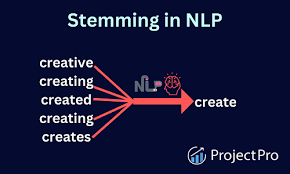

In [390]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [391]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,use phone month found pro let talk screen scre...
1,first time use vivo iqoo phone use asus moto p...
2,look feel devic good plus perform phone also g...
3,week use discov smartphon function intend lag ...
4,want mobil perform multimedia purpos k u buy c...
...,...
95,best segment game
96,game ke liy thik hai
97,medium tech game
98,support app clone


 Converting words to Lemma

 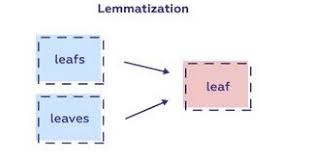

In [392]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,using phone month found pro let talk screen sc...
1,first time using vivo iqoo phone using asus mo...
2,look feel device good plus performance phone a...
3,week use discovered smartphone function intend...
4,want mobile performance multimedia purpose k u...
...,...
95,best segment gaming
96,gaming ke liye thik hai
97,medium tech gaming
98,supporting apps clone


In [393]:
c1=' '.join(yy['stemmed'])
c1[:1000]

'using phone month found pro let talk screen screen lot offer hdr huge contrast ratio peak brightness phone offer really crisp image great colour watching video even standing sun turn screen brightness fight sunlight able see everything screen clearly gaming touch response also great given environment offer good ping m delay say ideal gaming camera camera one camera give peak performance compare video quality recorded phone panasonic cx camera thing outdo good recording condition image quite impressive yeah since mid range phone give much macro mode attached image captured macro mode see crisp color normal night image normal night image also nice deliver expect long exposure shot long exposure shot one amaze phone geek performs well third image long exposure shot taken phone performance dimensity delivers exactly advertise performance peak everything image processing video editing high end gaming everything amazed know thing run genshin impact highest setting multiplayer game screen de

visualizing word cloud
---

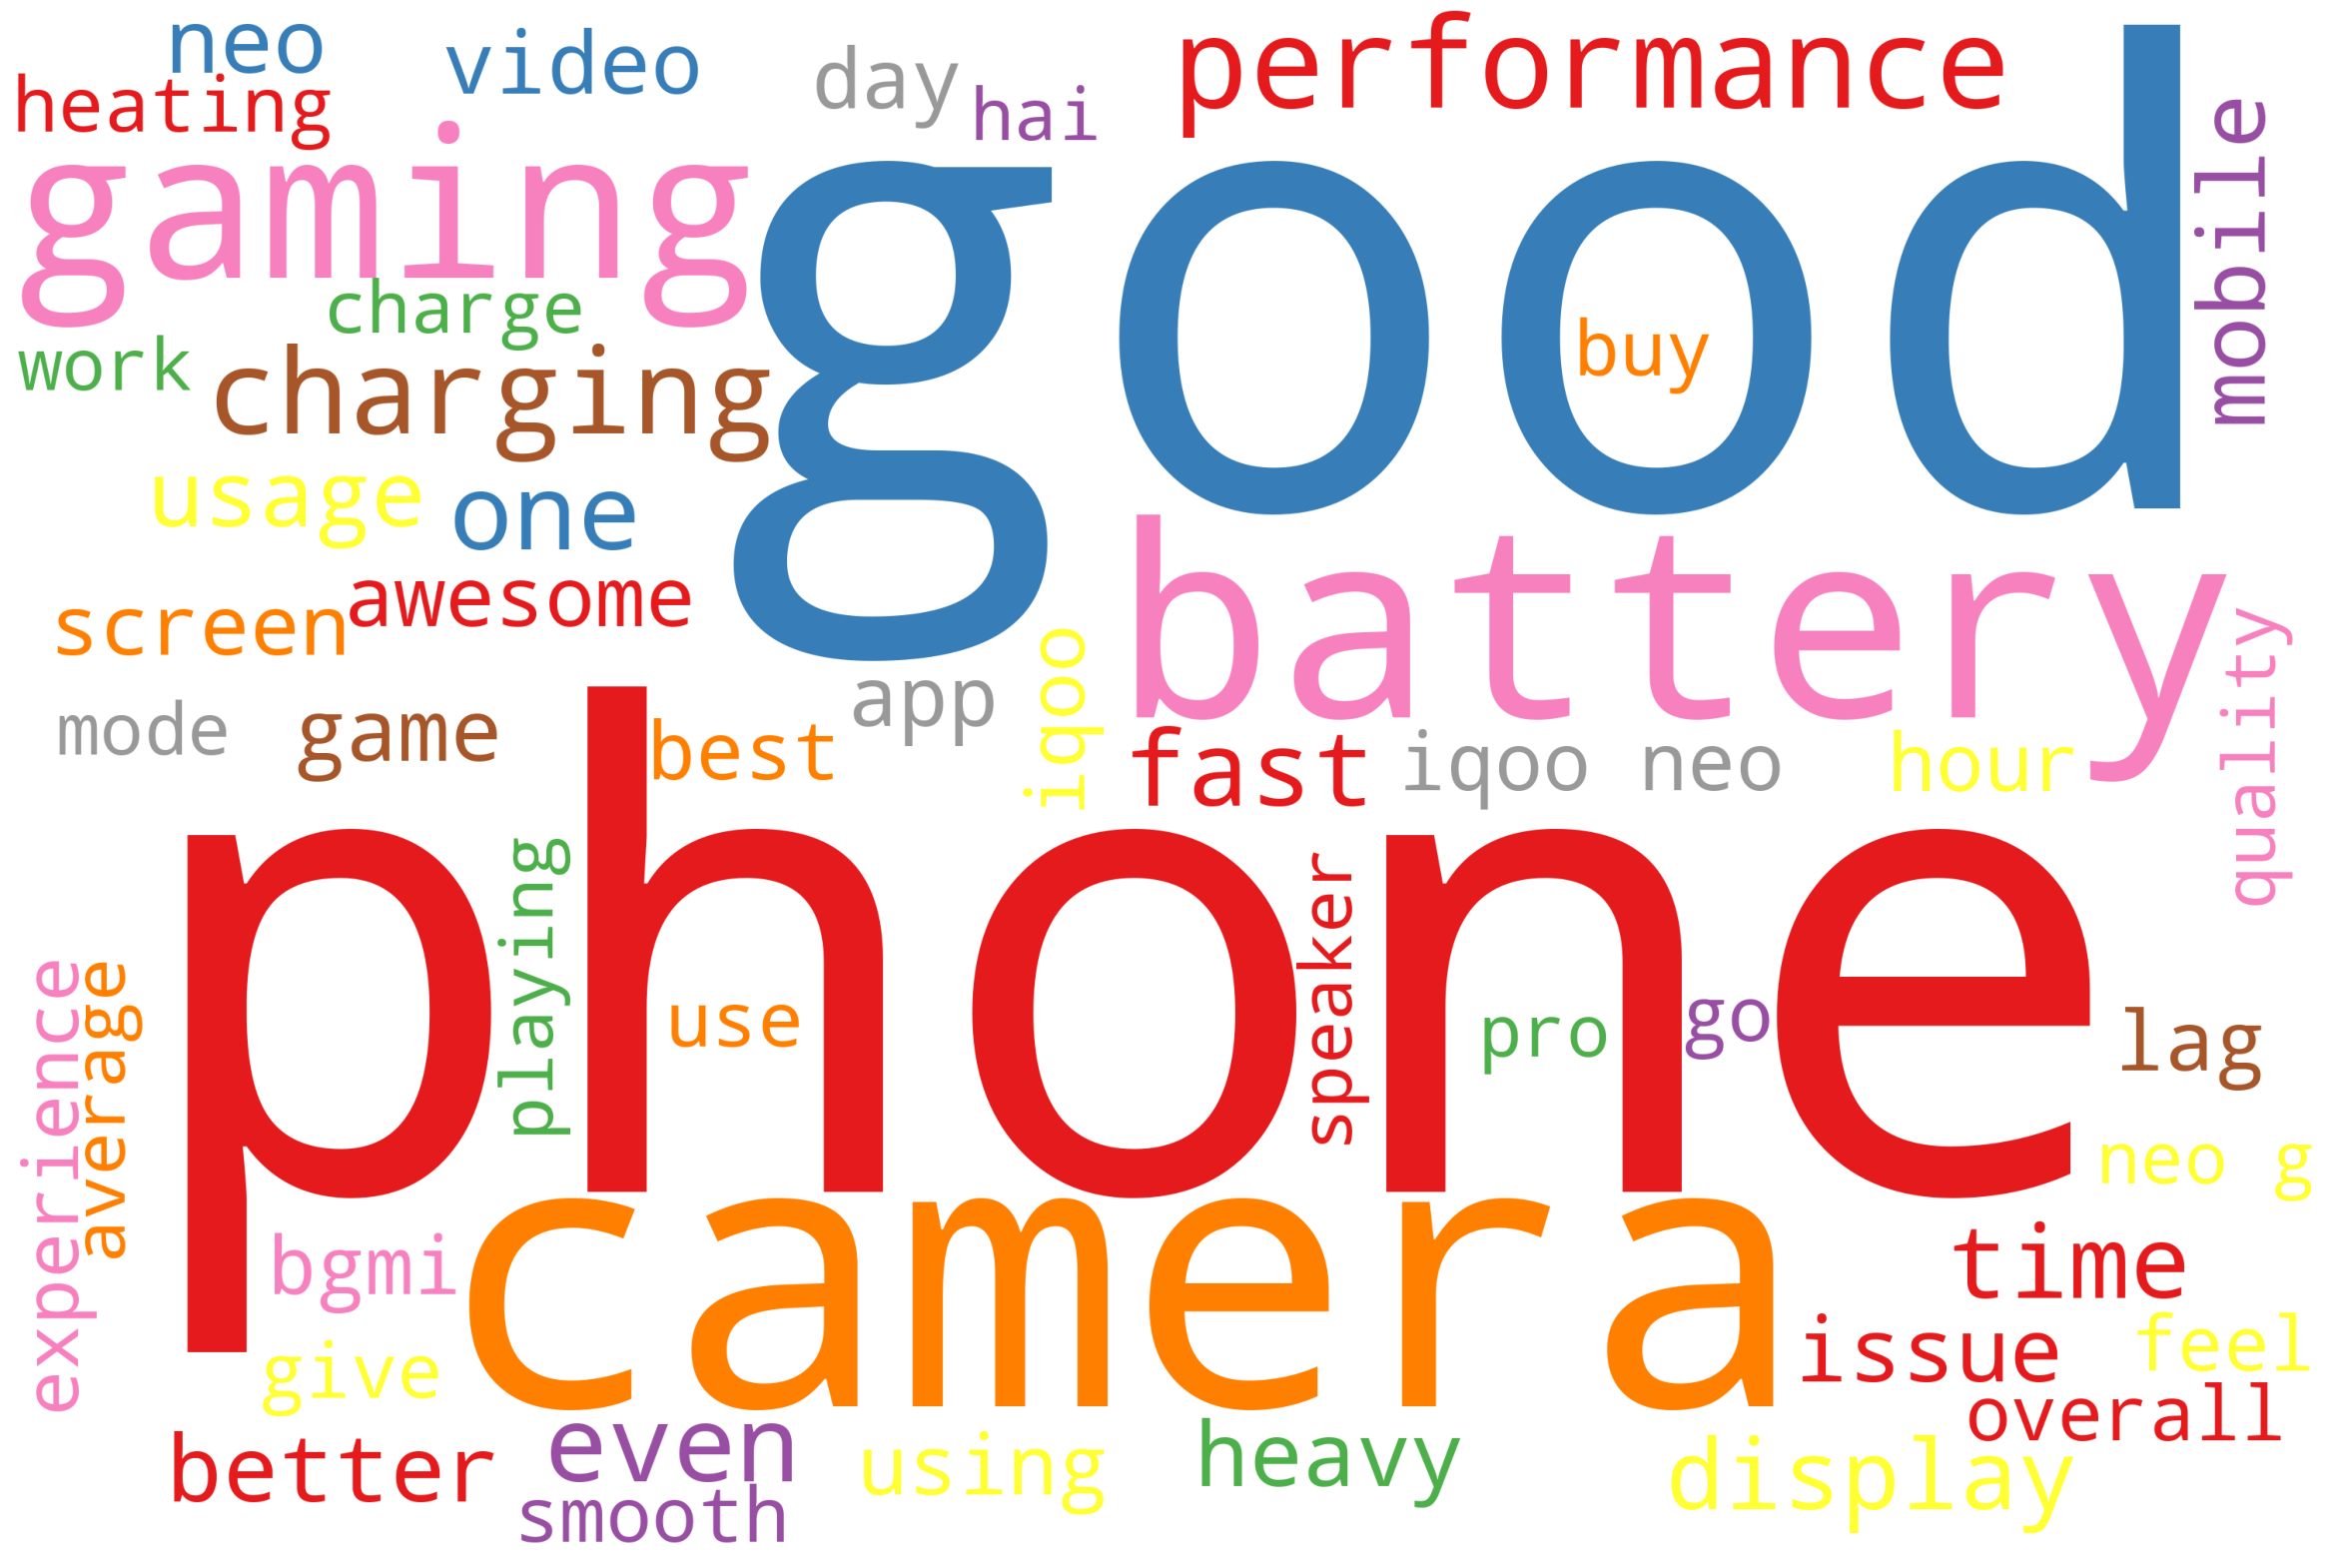

In [394]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(30,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=50,
                   colormap='Set1').generate(c1)
plot_cloud(wordcloud)

# Feature Extaction
**Applying bag of Words without N grams**

In [395]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [396]:
print(cv.get_feature_names_out()[109:200])

['butfor' 'buttery' 'button' 'buy' 'buying' 'call' 'called' 'cam' 'camera'
 'cameragood' 'camoverall' 'canceled' 'cancelled' 'cannot' 'capability'
 'capture' 'captured' 'care' 'catch' 'cellphone' 'center' 'centric' 'chal'
 'challenging' 'chalti' 'changed' 'character' 'charge' 'charged' 'charger'
 'chargeri' 'charging' 'cheap' 'check' 'checked' 'chinese' 'chipset'
 'choicebut' 'clarity' 'classic' 'claw' 'clean' 'clear' 'clearly' 'click'
 'clone' 'close' 'cod' 'color' 'colour' 'come' 'comeback' 'coming'
 'commendable' 'comment' 'commenting' 'company' 'compare' 'compared'
 'comparing' 'competition' 'competitor' 'complain' 'complaint' 'complete'
 'con' 'concerned' 'conclusion' 'condition' 'connected' 'connectivity'
 'consider' 'considered' 'contained' 'content' 'contentall' 'continuesly'
 'continuous' 'continuouse' 'continuously' 'contrast' 'cool' 'cooler'
 'cooling' 'core' 'could' 'coupled' 'course' 'cover' 'coz' 'cpu']


In [397]:
print(cv.get_feature_names_out()[:100])

['aacv' 'able' 'absolutely' 'ac' 'access' 'account' 'achieve' 'activate'
 'actual' 'ad' 'adaptor' 'add' 'added' 'additionally' 'adjust' 'adsui'
 'advertise' 'aesthetic' 'aisa' 'allocated' 'allowing' 'allows' 'almost'
 'along' 'also' 'alsoeverything' 'although' 'always' 'amaze' 'amazed'
 'amazing' 'amazon' 'android' 'angle' 'animation' 'another' 'antutu'
 'anything' 'app' 'apple' 'appreciate' 'approach' 'apps' 'around' 'aspect'
 'asus' 'attached' 'available' 'average' 'awasome' 'awesome' 'back'
 'background' 'backlit' 'backup' 'backupgood' 'bad' 'ban' 'bandwidth'
 'bank' 'bat' 'batter' 'battery' 'bciz' 'bcoz' 'beast' 'beasti' 'beat'
 'became' 'become' 'believe' 'bench' 'best' 'better' 'bgmi' 'bhaut' 'big'
 'bit' 'black' 'blaster' 'blend' 'blink' 'bloatware' 'block' 'blue' 'blur'
 'blurr' 'bol' 'bookeh' 'boost' 'bought' 'boy' 'brand' 'breathtaking'
 'bright' 'brightens' 'brightness' 'brilliant' 'brings' 'britness']


In [398]:
print(tweetscv.toarray()[100:200])

[]


**CountVectorizer with N-grams (Bigrams & Trigrams)**</a>

In [399]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in range(0, len(dataframe)):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [400]:
corpus[3]

'week use discov smartphon function intend lag whatsoev batteri life satisfactori last whole day gener usag exclud heavi game experi differ daili task intens game notic drop frame rate camera qualiti decent although provid incred detail shot satisfactori job nevertheless intens game devic warm bit problem long back cover sinc even notic user interfac run smoothli pleasantli surpris find phone contain signific bloatwar preinstal app easili uninstal game devic recommend activ monster mode order boost fp significantli'

In [401]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [402]:
X.shape

(100, 5000)

In [403]:
cv.get_feature_names_out()[:20]

array(['aacv', 'aacv aacv', 'aacv aacv flac', 'aacv flac',
       'aacv flac support', 'abl', 'abl see', 'abl see everyth',
       'abl switch', 'abl switch vivo', 'absolut', 'absolut amaz',
       'absolut amaz perform', 'ac', 'ac design', 'ac design worst',
       'ac even', 'ac even say', 'access', 'access devic'], dtype=object)

In [404]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [405]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,aacv,aacv aacv,aacv aacv flac,aacv flac,aacv flac support,abl,abl see,abl see everyth,abl switch,abl switch vivo,...,youtub video,youtub video higher,yr,zabardast,zabardast hai,zabardast hai sirf,zaldi,zaldi low,zaldi low ho,zoom
0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 **TF-IDF Vectorizer**

In [406]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in range(0, len(dataframe)):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [407]:
corpus[4]

'want mobil perform multimedia purpos k u buy come camera even k mobil achiev best photo camera low light u captur nois even u scan upi payment yhe camera focus properli'

In [408]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [409]:
X.shape

(100, 5000)

In [410]:
tfidf_v.get_feature_names_out()[:20]

array(['aacv', 'aacv aacv', 'aacv aacv flac', 'aacv flac',
       'aacv flac support', 'abl', 'abl see', 'abl see everyth',
       'abl switch', 'abl switch vivo', 'absolut', 'absolut amaz',
       'absolut amaz perform', 'ac', 'ac design', 'ac design worst',
       'ac even', 'ac even say', 'access', 'access devic'], dtype=object)

In [411]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [412]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,aacv,aacv aacv,aacv aacv flac,aacv flac,aacv flac support,abl,abl see,abl see everyth,abl switch,abl switch vivo,...,youtub video,youtub video higher,yr,zabardast,zabardast hai,zabardast hai sirf,zaldi,zaldi low,zaldi low ho,zoom
0,0.0,0.0,0.0,0.0,0.0,0.033072,0.036041,0.036041,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Named Entity Recognition (NER)

In [413]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'using phone month found pro let talk screen screen lot offer hdr huge contrast ratio peak brightness phone offer really crisp image great colour watching video even standing sun turn screen brightness fight sunlight able see everything screen clearly gaming touch response also great given environment offer good ping m delay say ideal gaming camera camera one camera give peak performance compare video quality recorded phone panasonic cx camera thing outdo good recording condition image quite impressive yeah since mid range phone give much macro mode attached image captured macro mode see crisp color normal night image normal night image also nice deliver expect long exposure shot long exposure shot one amaze phone geek performs well third image long exposure shot taken phone performance dimensity delivers exactly advertise performance peak everything image processing video editing high end gaming everything amazed know thing run genshin impact highest setting multiplayer game screen de

In [414]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [415]:
for token in doc_block[:50]:
    print(token,token.pos_)

using VERB
phone NOUN
month NOUN
found VERB
pro X
let VERB
talk NOUN
screen NOUN
screen NOUN
lot NOUN
offer VERB
hdr PROPN
huge ADJ
contrast NOUN
ratio NOUN
peak NOUN
brightness NOUN
phone NOUN
offer NOUN
really ADV
crisp ADJ
image NOUN
great ADJ
colour NOUN
watching VERB
video NOUN
even ADV
standing VERB
sun PROPN
turn VERB
screen NOUN
brightness NOUN
fight NOUN
sunlight NOUN
able ADJ
see VERB
everything PRON
screen NOUN
clearly ADV
gaming VERB
touch NOUN
response NOUN
also ADV
great ADJ
given VERB
environment NOUN
offer VERB
good PROPN
ping PROPN
m VERB


In [416]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['impact', 'setting', 'multiplayer', 'game', 'screen', 'delivers', 'rate', 'checked', 'phone', 'touch', 'sampling', 'rate', 'monster', 'run', 'apps', 'go', 'lag', 'let', 'talk', 'battery', 'management', 'phone', 'eats', 'battery', 'battery', 'stay', 'run', 'game', 'state', 'impact', 'course', 'phone', 'come', 'watt', 'charging', 'charge', 'minute', 'start', 'gaming', 'hour', 'day', 'cpu', 'throttling', 'say', 'performance', 'heat', 'performance', 'drop', 'margin', 'gaming', 'moment', 'company', 'advertise', 'cooling', 'system', 'believe', 'need', 'thing', 'heat', 'help', 'decide', 'buying', 'time', 'using', 'iqoo', 'phone', 'using', 'asus', 'phone', 'experience', 'let', 'start', 'day', 'usage', 'become', 'user', 'remove', 'pre', 'installed', 'apps', 'turn', 'apps', 'battery', 'seen', 'lot', 'user', 'commenting', 'battery', 'life', 'made', 'comment', 'purchasing', 'product', 'battery', 'backup', 'heating', 'experienced', 'heating', 'playing', 'hr']


In [417]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,91
1,camera,72
2,battery,42
3,gaming,30
4,performance,29
5,charging,25
6,neo,25
7,iqoo,22
8,time,18
9,display,17


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

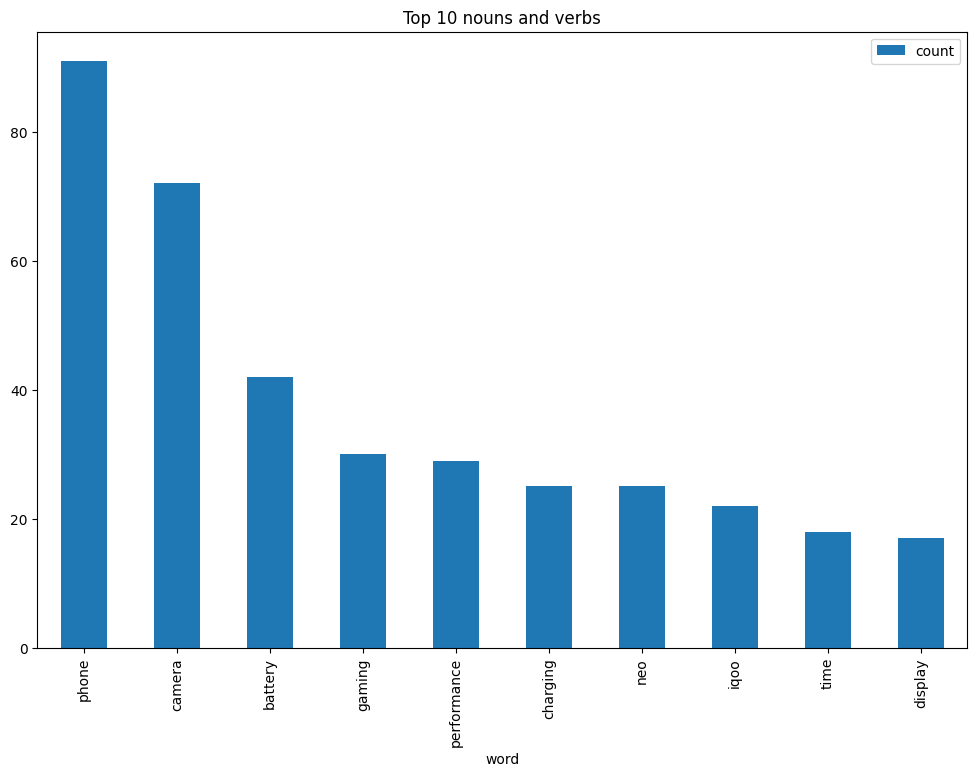

In [418]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

Feature Extraction
----
- Bag of words (Simple vectorization)
- TFID



In [419]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# sentiments anlaysis using NLTK's Sentiment-Intensity-Analyzer


In [420]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [421]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,94
neg,6


In [422]:
dataframe.Clean_Reviews[8]

'let give genuine original review uncommon matter making decision camera bad camera good software tuning changed original colour little bright know people complaint camera dslr yes camera matter much moving k mobile k iqoo phone found camera impressive night camera better neo tune bright colour capture low light coz gw improvement bookeh better effect blurr background better neo display good time contrast neo screen support hdr easily run bit hz k hdr video without lag black almost black display reflect backlit light leak making greyish sense upgraded vulkan x execution unit compared sd better neo except e series display dolby vision missing missing well ram gb gb dynamic ram dynamically allocated depending space quite enough support extended ram pro neo memory bandwidth double sd sound sound loud feel depth listen stereo sound highly dynamic range loud previous phone loud clear listen kbps static rate mp without feeling loss aacv aacv flac supported else want guy lag mtk poor impressi

In [423]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.083, 'neu': 0.621, 'pos': 0.295, 'compound': 0.9975}

In [424]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,using phone month found pro let talk screen sc...,"{'neg': 0.049, 'neu': 0.713, 'pos': 0.238, 'co..."
1,first time using vivo iqoo phone using asus mo...,"{'neg': 0.07, 'neu': 0.702, 'pos': 0.228, 'com..."
2,look feel device good plus performance phone a...,"{'neg': 0.098, 'neu': 0.682, 'pos': 0.22, 'com..."
3,week use discovered smartphone function intend...,"{'neg': 0.077, 'neu': 0.687, 'pos': 0.235, 'co..."
4,want mobile performance multimedia purpose k u...,"{'neg': 0.069, 'neu': 0.752, 'pos': 0.18, 'com..."


In [425]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,using phone month found pro let talk screen sc...,"{'neg': 0.049, 'neu': 0.713, 'pos': 0.238, 'co...",0.9951
1,first time using vivo iqoo phone using asus mo...,"{'neg': 0.07, 'neu': 0.702, 'pos': 0.228, 'com...",0.9719
2,look feel device good plus performance phone a...,"{'neg': 0.098, 'neu': 0.682, 'pos': 0.22, 'com...",0.4939
3,week use discovered smartphone function intend...,"{'neg': 0.077, 'neu': 0.687, 'pos': 0.235, 'co...",0.8934
4,want mobile performance multimedia purpose k u...,"{'neg': 0.069, 'neu': 0.752, 'pos': 0.18, 'com...",0.5267


In [426]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,using phone month found pro let talk screen sc...,"{'neg': 0.049, 'neu': 0.713, 'pos': 0.238, 'co...",0.9951,Positive
1,first time using vivo iqoo phone using asus mo...,"{'neg': 0.07, 'neu': 0.702, 'pos': 0.228, 'com...",0.9719,Positive
2,look feel device good plus performance phone a...,"{'neg': 0.098, 'neu': 0.682, 'pos': 0.22, 'com...",0.4939,Positive
3,week use discovered smartphone function intend...,"{'neg': 0.077, 'neu': 0.687, 'pos': 0.235, 'co...",0.8934,Positive
4,want mobile performance multimedia purpose k u...,"{'neg': 0.069, 'neu': 0.752, 'pos': 0.18, 'com...",0.5267,Positive
...,...,...,...,...
95,best segment gaming,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.6369,Positive
96,gaming ke liye thik hai,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
97,medium tech gaming,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
98,supporting apps clone,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Positive


In [427]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<Axes: xlabel='sentiment', ylabel='count'>

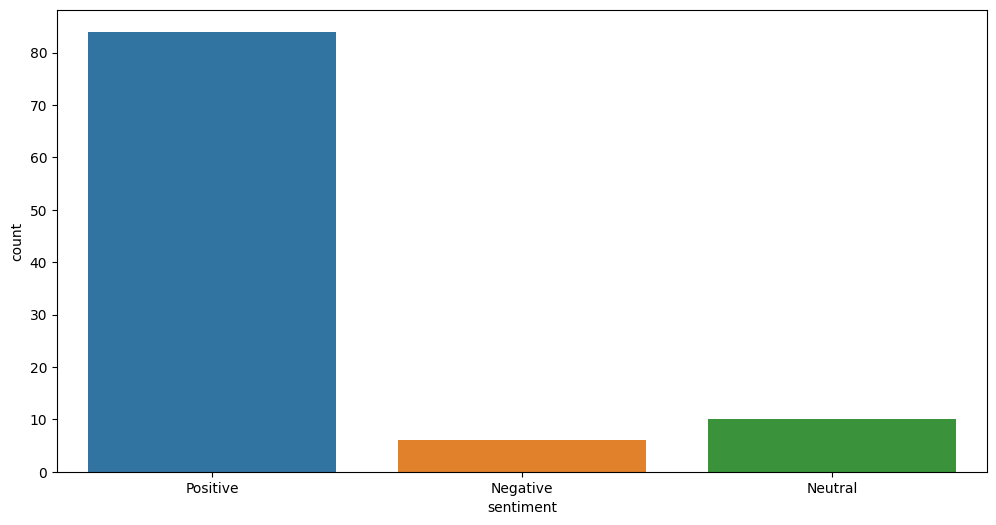

In [428]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [429]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,sentiment
0,using phone month found pro let talk screen sc...,using phone month found pro let talk screen sc...,pos
1,first time using vivo iqoo phone using asus mo...,first time using vivo iqoo phone using asus mo...,pos
2,look feel device good plus performance phone a...,look feel device good plus performance phone a...,pos
3,week use discovered smartphone function intend...,week use discovered smartphone function intend...,pos
4,want mobile performance multimedia purpose k u...,want mobile performance multimedia purpose k u...,pos


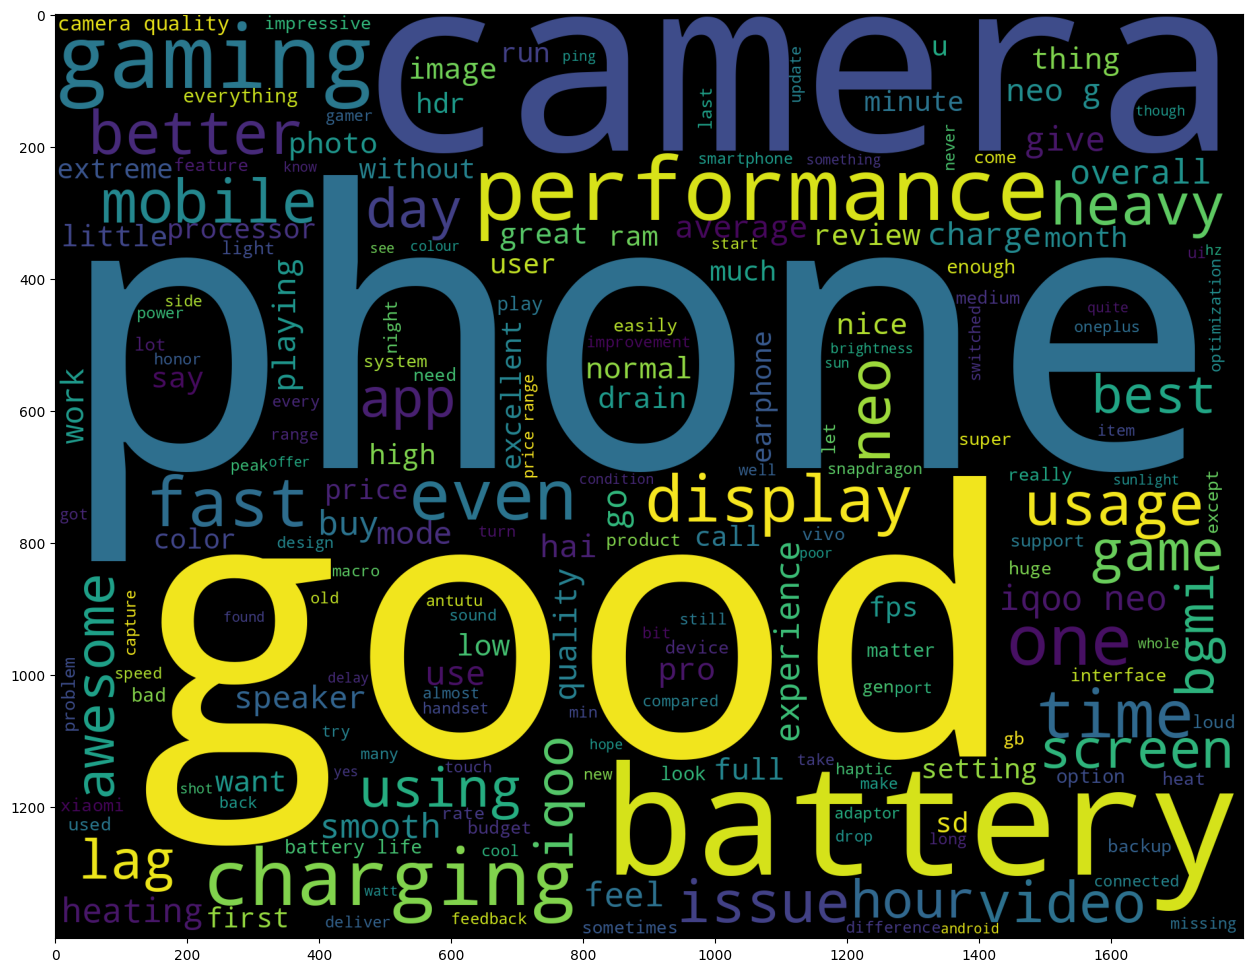

In [430]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

# visualizing sentiments

Positive review
----

In [431]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

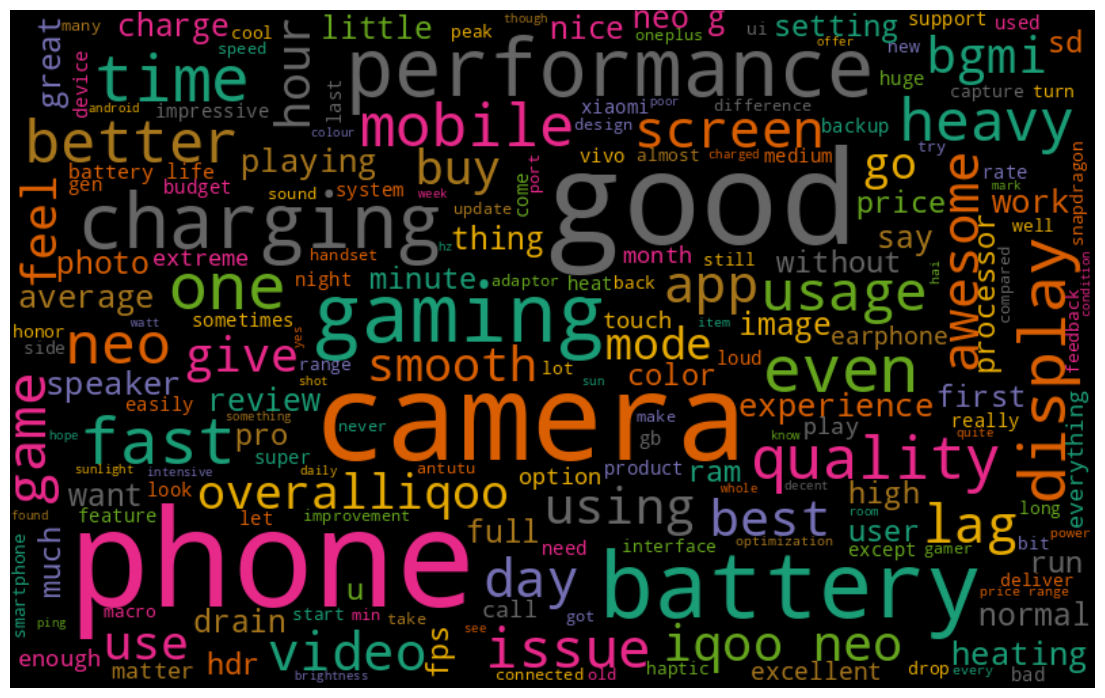

In [432]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

Negative Review
----

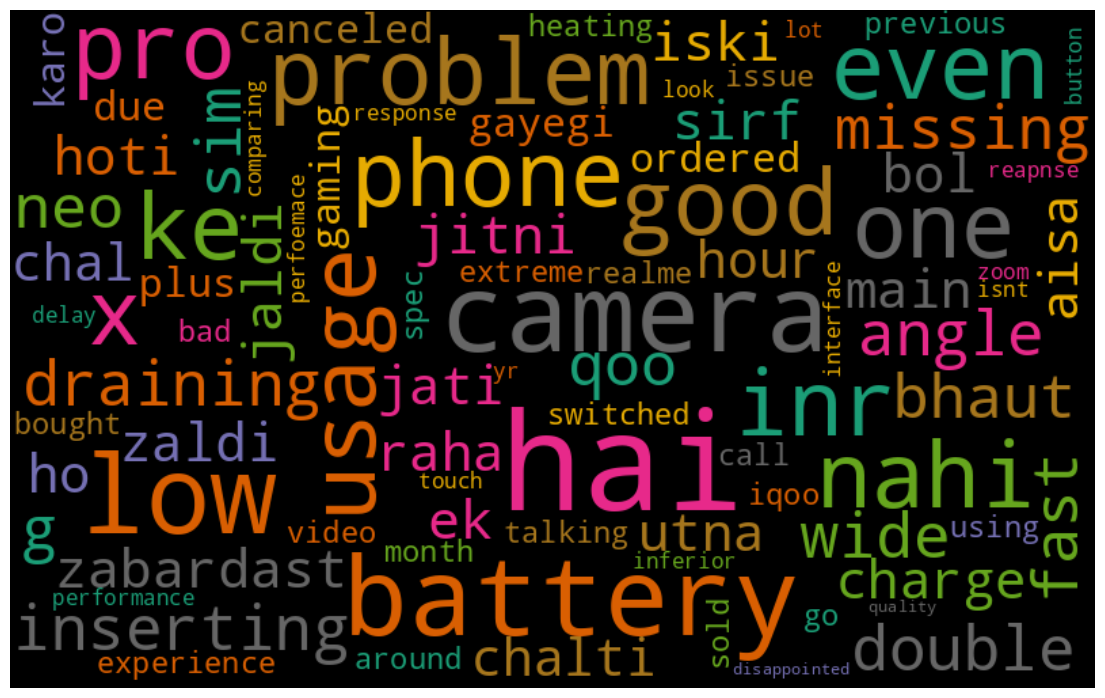

In [433]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)